In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from xgboost import XGBClassifier

In [5]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

In [6]:
import time

In [7]:
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,precision_score,recall_score,roc_curve,auc,accuracy_score,f1_score
# from imblearn.over_sampling import SMOTE
from collections import Counter

In [8]:
df = pd.read_csv(r"F:\MIT 5th Sem\MP III\Research Paper\Breast Cancer Data.csv")

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
df.shape

(569, 33)

In [12]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [13]:
df.drop('Unnamed: 32',axis = 1,inplace = True)

In [14]:
df.isnull().sum().sum()

0

In [15]:
# feature is not for our use as it consist of id of the patient
df.drop('id',axis=1,inplace= True)

In [16]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [17]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df.shape

(569, 31)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
df[[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] = scaler.fit_transform(df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']])

In [22]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [23]:
X =df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']

In [24]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

[0.04883442 0.02445734 0.04929908 0.05077245 0.01232259 0.01830034
 0.04598072 0.07346483 0.00728987 0.00688569 0.01819839 0.00585161
 0.01546865 0.0556695  0.00502556 0.00789041 0.00834389 0.01017054
 0.00557082 0.00550831 0.09824531 0.0226613  0.09487169 0.07168919
 0.02109356 0.02771915 0.04392448 0.12018118 0.01311937 0.01118973]


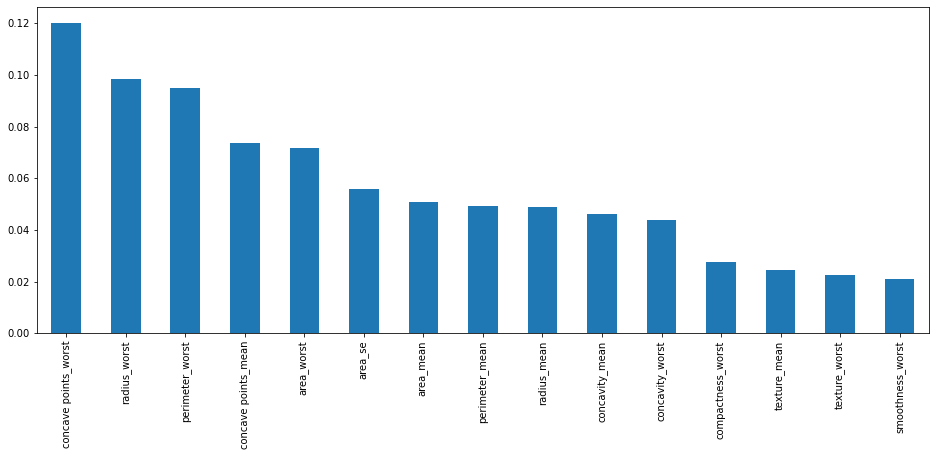

In [26]:
Xt = X
yt = y
model = ExtraTreesClassifier()
model.fit(Xt,yt)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=Xt.columns)
feat_importances.nlargest(15).plot(kind='bar',figsize=(16,6))
plt.show()

In [27]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
2,perimeter_mean,18652.89
0,radius_mean,18389.75
20,radius_worst,3007.67
22,perimeter_worst,1562.16
3,area_mean,881.20
23,area_worst,804.99
5,compactness_mean,167.40
10,radius_se,159.82
6,concavity_mean,158.31
7,concave points_mean,147.98


In [28]:
X.drop(['perimeter_mean','radius_mean','radius_worst','perimeter_worst'],axis =1,inplace = True)

In [29]:
X.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [30]:
X.shape

(569, 26)

In [31]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
4,concavity_mean,144.92
5,concave points_mean,139.35
23,concave points_worst,135.06
18,texture_worst,106.84
21,compactness_worst,105.63
3,compactness_mean,98.44
20,smoothness_worst,86.80
22,concavity_worst,85.56
8,radius_se,75.64
2,smoothness_mean,75.57


In [32]:
X.drop(['concavity_mean','concave points_mean'],axis =1,inplace = True)

In [33]:
X.shape

(569, 24)

In [34]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
16,texture_worst,106.22
19,compactness_worst,93.64
21,concave points_worst,91.27
18,smoothness_worst,84.27
6,radius_se,73.65
2,smoothness_mean,70.56
0,texture_mean,69.45
8,perimeter_se,64.99
23,fractal_dimension_worst,64.40
1,area_mean,56.53


In [35]:
X.drop(['texture_worst'],axis =1,inplace = True)

In [36]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
18,compactness_worst,93.64
20,concave points_worst,90.16
17,smoothness_worst,78.39
6,radius_se,72.40
2,smoothness_mean,69.71
8,perimeter_se,64.80
22,fractal_dimension_worst,64.36
3,compactness_mean,55.29
1,area_mean,55.27
19,concavity_worst,55.04


In [37]:
X.drop(['compactness_worst','concave points_worst'],axis =1,inplace = True)

In [38]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
17,smoothness_worst,72.64
6,radius_se,72.23
2,smoothness_mean,68.39
8,perimeter_se,64.12
16,area_worst,54.17
1,area_mean,53.10
20,fractal_dimension_worst,44.78
5,fractal_dimension_mean,42.81
19,symmetry_worst,41.55
18,concavity_worst,39.15


In [39]:
X.drop(['smoothness_worst'],axis =1,inplace = True)

In [40]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
6,radius_se,72.15
8,perimeter_se,64.11
16,area_worst,52.42
1,area_mean,50.97
19,fractal_dimension_worst,43.52
5,fractal_dimension_mean,42.77
3,compactness_mean,38.99
17,concavity_worst,38.19
18,symmetry_worst,34.94
2,smoothness_mean,33.33


In [41]:
X.drop(['radius_se'],axis =1,inplace = True)

In [42]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
15,area_worst,47.56
1,area_mean,46.33
18,fractal_dimension_worst,43.52
5,fractal_dimension_mean,41.31
3,compactness_mean,38.99
16,concavity_worst,38.10
17,symmetry_worst,34.87
7,perimeter_se,32.73
2,smoothness_mean,32.03
4,symmetry_mean,28.85


In [43]:
X.drop(['area_worst'],axis =1,inplace = True)

In [44]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
17,fractal_dimension_worst,43.37
5,fractal_dimension_mean,41.23
3,compactness_mean,38.97
15,concavity_worst,37.56
7,perimeter_se,32.73
16,symmetry_worst,32.10
2,smoothness_mean,31.77
4,symmetry_mean,28.26
8,area_se,23.34
10,compactness_se,22.39


In [45]:
X.drop(['fractal_dimension_worst'],axis =1,inplace = True)

In [46]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
3,compactness_mean,37.94
7,perimeter_se,32.68
2,smoothness_mean,31.76
4,symmetry_mean,27.14
16,symmetry_worst,26.94
5,fractal_dimension_mean,26.16
15,concavity_worst,23.90
8,area_se,23.27
10,compactness_se,21.97
12,concave points_se,21.66


In [47]:
X.drop(['compactness_mean'],axis =1,inplace = True)

In [48]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
6,perimeter_se,31.68
2,smoothness_mean,30.69
3,symmetry_mean,26.51
15,symmetry_worst,26.07
7,area_se,23.05
4,fractal_dimension_mean,22.27
11,concave points_se,21.61
14,concavity_worst,18.45
9,compactness_se,16.33
1,area_mean,15.21


In [49]:
X.drop(['perimeter_se'],axis =1,inplace = True)

In [50]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
2,smoothness_mean,30.20
3,symmetry_mean,26.23
14,symmetry_worst,25.34
4,fractal_dimension_mean,21.79
13,concavity_worst,18.18
10,concave points_se,17.99
8,compactness_se,16.18
1,area_mean,15.09
9,concavity_se,12.28
12,fractal_dimension_se,11.99


In [51]:
X.drop(['smoothness_mean'],axis =1,inplace = True)

In [52]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
13,symmetry_worst,25.22
2,symmetry_mean,25.06
12,concavity_worst,17.87
9,concave points_se,16.45
7,compactness_se,15.43
3,fractal_dimension_mean,14.34
1,area_mean,13.56
8,concavity_se,11.93
11,fractal_dimension_se,11.59
10,symmetry_se,9.44


In [53]:
X.drop(['symmetry_worst'],axis =1,inplace = True)

In [54]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
9,concave points_se,16.25
7,compactness_se,15.27
2,symmetry_mean,14.85
3,fractal_dimension_mean,14.23
12,concavity_worst,13.87
1,area_mean,13.50
11,fractal_dimension_se,11.58
8,concavity_se,11.46
0,texture_mean,8.19
6,smoothness_se,6.66


In [55]:
X.drop(['concave points_se'],axis =1,inplace = True)

In [56]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
7,compactness_se,14.20
2,symmetry_mean,14.18
3,fractal_dimension_mean,14.17
11,concavity_worst,13.32
1,area_mean,11.67
10,fractal_dimension_se,11.50
8,concavity_se,8.98
0,texture_mean,8.19
6,smoothness_se,6.38
9,symmetry_se,6.25


In [57]:
X.drop(['compactness_se'],axis =1,inplace = True)

In [58]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
2,symmetry_mean,14.16
3,fractal_dimension_mean,14.05
1,area_mean,11.65
10,concavity_worst,11.46
7,concavity_se,8.73
9,fractal_dimension_se,8.22
0,texture_mean,8.18
6,smoothness_se,6.34
4,texture_se,6.15
8,symmetry_se,5.92


In [59]:
X.drop(['symmetry_mean'],axis =1,inplace = True)

In [60]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
9,concavity_worst,11.30
2,fractal_dimension_mean,10.79
1,area_mean,10.45
6,concavity_se,8.72
0,texture_mean,8.10
8,fractal_dimension_se,7.94
5,smoothness_se,6.31
3,texture_se,6.15
7,symmetry_se,4.87
4,area_se,4.29


In [61]:
X.drop(['concavity_worst'],axis =1,inplace = True)

In [62]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
1,area_mean,8.23
0,texture_mean,7.68
2,fractal_dimension_mean,7.50
8,fractal_dimension_se,7.35
3,texture_se,5.83
5,smoothness_se,5.75
6,concavity_se,5.08
7,symmetry_se,4.75
4,area_se,4.27


In [63]:
X.shape

(569, 9)

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [65]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 9), (114, 9), (455,), (114,))

In [66]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())

In [67]:
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      445
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:48   Pearson chi2:                     160.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -17.3652      2.412     -7.199      0.000     -22.093     -12.637
texture_mean              12.7904      2.498      5.120      0.000       7.894      17.687
area_mean                 34.3121      6.454      5.317      0.000      21.663      46.961
fractal_dimension_mean    18.7125      3.301      5.669      0.000      12.243      25.182
texture_se                -8.7640      3.564     -2.459      0.014     -15.748      -1.780
area_se                   57.2207     16.401      3.489      0.000      25.075      89.366
smoothness_se              2.2740      3.374      0.674      0.500      -4.339       8.887
concavity_se               7.3155      3.574      2.047      0.041       0.310      14.321
symmetry_se                1.9325      2.544      0.760      0.448      -3.054       6.919
fractal_dimension_se     -22.2636      6.504     -3.423      0.001     -35.011      -9.517
==========================================================================================
"""

In [68]:
df.shape

(569, 31)

In [69]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
5,1,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,0.080753,0.117132,0.068793,0.038080,0.197063,0.234311,0.092727,0.215382,0.193730,0.144660,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
6,1,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,0.121383,0.091275,0.114169,0.087987,0.088418,0.086881,0.056919,0.196818,0.081725,0.044367,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
7,1,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,0.517060,0.170922,0.224717,0.146021,0.082477,0.241085,0.210578,0.062828,0.274294,0.098188,0.156060,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
8,1,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,0.504002,0.070541,0.141841,0.077699,0.032720,0.136588,0.246102,0.089722,0.232241,0.190634,0.098607,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
9,1,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.683867,0.067391,0.273780,0.060406,0.032010,0.184791,0.525115,0.195530,0.271263,0.140823,0.317331,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000


In [70]:
data = df.copy()

In [71]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [72]:
data.drop(['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst'],axis =1,inplace = True)

In [73]:
data.shape

(569, 21)

In [74]:
X= data.drop('diagnosis',axis = 1)

In [75]:
y= data['diagnosis']

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 20), (114, 20), (455,), (114,))

In [77]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      434
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:49   Pearson chi2:                     116.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -17.9051      7.611     -2.353      0.019     -32.822      -2.988
radius_mean              249.4336    183.274      1.361      0.174    -109.776     608.643
texture_mean              23.0021      5.979      3.847      0.000      11.283      34.721
perimeter_mean          -370.8923    186.977     -1.984      0.047    -737.361      -4.423
area_mean                145.2315     89.943      1.615      0.106     -31.053     321.516
smoothness_mean           -1.3632      8.699     -0.157      0.875     -18.413      15.687
compactness_mean          -6.2552     23.298     -0.268      0.788     -51.918      39.408
concavity_mean            67.0500     24.921      2.690      0.007      18.206     115.894
concave points_mean       21.5093     18.779      1.145      0.252     -15.297      58.315
symmetry_mean             16.6644      7.834      2.127      0.033       1.311      32.018
fractal_dimension_mean     9.2435     12.740      0.726      0.468     -15.726      34.213
radius_se               -154.0926     77.903     -1.978      0.048    -306.779      -1.406
texture_se               -15.7304      6.091     -2.582      0.010     -27.669      -3.791
perimeter_se              13.6054     44.702      0.304      0.761     -74.009     101.220
area_se                  370.4155    148.083      2.501      0.012      80.178     660.653
smoothness_se              5.6990      6.604      0.863      0.388      -7.245      18.644
compactness_se            -1.2273     13.526     -0.091      0.928     -27.737      25.282
concavity_se             -53.7363     37.647     -1.427      0.153    -127.522      20.050
concave points_se         -8.8615     12.958     -0.684      0.494     -34.259      16.536
symmetry_se               -3.7973      7.366     -0.516      0.606     -18.235      10.640
fractal_dimension_se     -17.0426     19.855     -0.858      0.391     -55.958      21.873
==========================================================================================
"""

### Hypothesis testing - 
- Null Hypothesis ==> all the features are not significent 
- Alternate Hypothesis ==> all the feature are significent
- alpha values ==>0.05

by Hypothesis testing 

if(p_value < alpha) then **reject Null Hypothesis**
else **Fail to reject Null Hypothesis**

                    OR
 
if(p_value > alpha then **Fail to reject Null Hypothesis**
else **reject Null Hypothesis**

In [78]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
2,perimeter_mean,14522.91
0,radius_mean,12849.91
3,area_mean,281.39
5,compactness_mean,116.98
6,concavity_mean,99.52
7,concave points_mean,97.61
10,radius_se,90.58
12,perimeter_se,80.92
4,smoothness_mean,40.98
13,area_se,36.86


In [79]:
logistic_model = LogisticRegression()

In [80]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
19,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,0.162174,0.057360,0.094678,0.061301,0.031300,0.229425,0.092739,0.060278,0.249100,0.167699,0.048547
420,0.217190,0.315522,0.210144,0.112916,0.296380,0.177412,0.128515,0.070974,0.490404,0.267692,0.063335,0.238640,0.068275,0.025211,0.189176,0.136825,0.112298,0.166679,0.151939,0.084442
106,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,0.320977,0.070433,0.286598,0.065872,0.025809,0.232077,0.156578,0.074369,0.264823,0.109304,0.101751
488,0.222396,0.218465,0.219059,0.117497,0.543198,0.224679,0.100258,0.155666,0.400505,0.295914,0.094079,0.175433,0.084672,0.038790,0.247646,0.080121,0.046742,0.221065,0.191901,0.080089
522,0.202518,0.342239,0.190104,0.103754,0.293220,0.075916,0.011872,0.028151,0.291414,0.283698,0.008293,0.159742,0.010564,0.004725,0.084543,0.027398,0.009712,0.077003,0.098328,0.048374
127,0.568839,0.311126,0.550135,0.421845,0.266679,0.186798,0.217221,0.279672,0.447475,0.010110,0.209343,0.216982,0.210102,0.139014,0.092294,0.188197,0.102020,0.257814,0.174734,0.061882
512,0.303800,0.365573,0.309930,0.175270,0.523337,0.391142,0.338566,0.406163,0.533333,0.490522,0.101068,0.126061,0.110069,0.050183,0.125812,0.153198,0.087172,0.252699,0.129003,0.107451
36,0.344030,0.406155,0.344413,0.207635,0.411664,0.277345,0.309044,0.278231,0.416667,0.237784,0.063190,0.145598,0.089526,0.033822,0.141585,0.208024,0.121591,0.219928,0.174453,0.108039
379,0.193999,0.308421,0.203925,0.092513,0.622642,0.601251,0.395736,0.316451,0.573737,0.622157,0.036176,0.147366,0.045328,0.013426,0.193494,0.324736,0.115859,0.253647,0.133647,0.122307
61,0.076530,0.381130,0.075116,0.033213,0.647016,0.215478,0.070291,0.046019,0.387879,0.370893,0.089336,0.377210,0.081798,0.021644,0.347316,0.220567,0.075758,0.175393,0.361457,0.074389


In [81]:
rfe = RFE(logistic_model,n_features_to_select=15, step=1)
rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('radius_mean', True, 1),
 ('texture_mean', True, 1),
 ('perimeter_mean', True, 1),
 ('area_mean', True, 1),
 ('smoothness_mean', True, 1),
 ('compactness_mean', True, 1),
 ('concavity_mean', True, 1),
 ('concave points_mean', True, 1),
 ('symmetry_mean', True, 1),
 ('fractal_dimension_mean', True, 1),
 ('radius_se', True, 1),
 ('texture_se', True, 1),
 ('perimeter_se', True, 1),
 ('area_se', True, 1),
 ('smoothness_se', False, 5),
 ('compactness_se', False, 4),
 ('concavity_se', False, 2),
 ('concave points_se', False, 6),
 ('symmetry_se', False, 3),
 ('fractal_dimension_se', True, 1)]

In [82]:
columns =X.columns[~rfe.support_]

In [83]:
columns

Index(['smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se'],
      dtype='object')

In [84]:
X.drop(columns=columns,axis =1,inplace=True)


In [85]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,fractal_dimension_se
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.183042
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.091110
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.127006
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.287205
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.145800


In [86]:
X.shape,X.columns

((569, 15),
 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se',
        'fractal_dimension_se'],
       dtype='object'))

In [87]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 15), (114, 15), (455,), (114,))

In [88]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      439
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:50   Pearson chi2:                     91.0
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -17.8302      7.582     -2.352      0.019     -32.690      -2.970
radius_mean               66.1496    145.512      0.455      0.649    -219.049     351.348
texture_mean              25.8665      6.322      4.091      0.000      13.475      38.258
perimeter_mean          -178.1105    143.052     -1.245      0.213    -458.486     102.265
area_mean                141.6629     92.124      1.538      0.124     -38.896     322.222
smoothness_mean           -0.2218      6.830     -0.032      0.974     -13.608      13.165
compactness_mean          -1.2586     14.186     -0.089      0.929     -29.063      26.546
concavity_mean            24.4268      9.448      2.585      0.010       5.909      42.945
concave points_mean       33.5106     12.907      2.596      0.009       8.213      58.808
symmetry_mean             11.1912      4.814      2.325      0.020       1.756      20.626
fractal_dimension_mean    10.2038      8.096      1.260      0.208      -5.665      26.072
radius_se               -171.0252     64.171     -2.665      0.008    -296.798     -45.252
texture_se               -14.9244      5.603     -2.663      0.008     -25.907      -3.942
perimeter_se              28.2706     33.178      0.852      0.394     -36.756      93.297
area_se                  361.8687    124.351      2.910      0.004     118.146     605.592
fractal_dimension_se     -47.5999     14.700     -3.238      0.001     -76.412     -18.788
==========================================================================================
"""

In [89]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
2,perimeter_mean,12716.32
0,radius_mean,10947.85
3,area_mean,255.55
10,radius_se,81.27
5,compactness_mean,78.66
12,perimeter_se,65.13
7,concave points_mean,54.71
13,area_se,35.43
4,smoothness_mean,32.99
6,concavity_mean,29.39


In [90]:
rfe = RFE(logistic_model,n_features_to_select=10, step=1)
rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('radius_mean', True, 1),
 ('texture_mean', True, 1),
 ('perimeter_mean', True, 1),
 ('area_mean', True, 1),
 ('smoothness_mean', False, 2),
 ('compactness_mean', True, 1),
 ('concavity_mean', True, 1),
 ('concave points_mean', True, 1),
 ('symmetry_mean', True, 1),
 ('fractal_dimension_mean', False, 5),
 ('radius_se', True, 1),
 ('texture_se', False, 6),
 ('perimeter_se', False, 3),
 ('area_se', False, 4),
 ('fractal_dimension_se', True, 1)]

In [91]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'fractal_dimension_se'],
      dtype='object')

In [92]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'fractal_dimension_se'],
      dtype='object')

In [93]:
X.shape

(569, 15)

In [94]:
X_train.shape  

(455, 15)

In [95]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      439
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:50   Pearson chi2:                     91.0
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -17.8302      7.582     -2.352      0.019     -32.690      -2.970
radius_mean               66.1496    145.512      0.455      0.649    -219.049     351.348
texture_mean              25.8665      6.322      4.091      0.000      13.475      38.258
perimeter_mean          -178.1105    143.052     -1.245      0.213    -458.486     102.265
area_mean                141.6629     92.124      1.538      0.124     -38.896     322.222
smoothness_mean           -0.2218      6.830     -0.032      0.974     -13.608      13.165
compactness_mean          -1.2586     14.186     -0.089      0.929     -29.063      26.546
concavity_mean            24.4268      9.448      2.585      0.010       5.909      42.945
concave points_mean       33.5106     12.907      2.596      0.009       8.213      58.808
symmetry_mean             11.1912      4.814      2.325      0.020       1.756      20.626
fractal_dimension_mean    10.2038      8.096      1.260      0.208      -5.665      26.072
radius_se               -171.0252     64.171     -2.665      0.008    -296.798     -45.252
texture_se               -14.9244      5.603     -2.663      0.008     -25.907      -3.942
perimeter_se              28.2706     33.178      0.852      0.394     -36.756      93.297
area_se                  361.8687    124.351      2.910      0.004     118.146     605.592
fractal_dimension_se     -47.5999     14.700     -3.238      0.001     -76.412     -18.788
==========================================================================================
"""

In [96]:
X_train.drop('smoothness_mean',inplace=True,axis= 1)

In [97]:
vif = pd.DataFrame()
Xtr = X_train
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
2,perimeter_mean,11120.58
0,radius_mean,9361.40
3,area_mean,245.62
9,radius_se,79.71
4,compactness_mean,78.74
11,perimeter_se,61.55
6,concave points_mean,47.15
12,area_se,34.75
5,concavity_mean,27.03
8,fractal_dimension_mean,19.85


In [98]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      440
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:50   Pearson chi2:                     91.3
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -17.9105      7.192     -2.490      0.013     -32.007      -3.814
radius_mean               67.0676    142.881      0.469      0.639    -212.974     347.109
texture_mean              25.8711      6.319      4.094      0.000      13.485      38.257
perimeter_mean          -178.5722    142.525     -1.253      0.210    -457.916     100.771
area_mean                141.2112     91.276      1.547      0.122     -37.686     320.108
compactness_mean          -1.2407     14.202     -0.087      0.930     -29.077      26.596
concavity_mean            24.4729      9.357      2.615      0.009       6.134      42.812
concave points_mean       33.2753     10.665      3.120      0.002      12.371      54.179
symmetry_mean             11.1333      4.457      2.498      0.013       2.397      19.870
fractal_dimension_mean    10.1561      7.966      1.275      0.202      -5.457      25.769
radius_se               -171.1233     64.138     -2.668      0.008    -296.831     -45.415
texture_se               -14.9192      5.600     -2.664      0.008     -25.894      -3.944
perimeter_se              28.6336     31.281      0.915      0.360     -32.677      89.944
area_se                  361.2203    122.708      2.944      0.003     120.718     601.723
fractal_dimension_se     -47.5156     14.478     -3.282      0.001     -75.891     -19.140
==========================================================================================
"""

In [99]:
X_train.drop('compactness_mean',inplace=True,axis= 1)

In [100]:
vif = pd.DataFrame()
Xtr = X_train
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
2,perimeter_mean,5889.74
0,radius_mean,5280.93
3,area_mean,223.47
8,radius_se,78.48
10,perimeter_se,60.64
5,concave points_mean,44.73
11,area_se,34.72
4,concavity_mean,26.87
6,symmetry_mean,13.79
7,fractal_dimension_mean,12.80


In [101]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      441
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:50   Pearson chi2:                     91.7
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -17.5908      6.101     -2.883      0.004     -29.548      -5.634
radius_mean               70.8539    136.126      0.521      0.603    -195.948     337.656
texture_mean              25.8723      6.307      4.102      0.000      13.511      38.234
perimeter_mean          -185.6234    117.931     -1.574      0.115    -416.764      45.517
area_mean                144.6330     81.625      1.772      0.076     -15.349     304.616
concavity_mean            24.2716      8.966      2.707      0.007       6.699      41.844
concave points_mean       33.1233     10.496      3.156      0.002      12.552      53.694
symmetry_mean             10.9439      3.878      2.822      0.005       3.343      18.545
fractal_dimension_mean     9.7354      6.337      1.536      0.124      -2.685      22.156
radius_se               -171.0367     64.134     -2.667      0.008    -296.737     -45.337
texture_se               -14.9957      5.533     -2.710      0.007     -25.840      -4.152
perimeter_se              30.0139     27.128      1.106      0.269     -23.155      83.183
area_se                  358.5657    118.407      3.028      0.002     126.493     590.639
fractal_dimension_se     -47.6825     14.344     -3.324      0.001     -75.795     -19.570
==========================================================================================
"""

In [102]:
X_train.drop('radius_mean',inplace=True,axis= 1)

In [103]:
vif = pd.DataFrame()
Xtr = X_train
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
1,perimeter_mean,232.38
2,area_mean,220.68
7,radius_se,59.55
9,perimeter_se,43.75
4,concave points_mean,38.45
10,area_se,34.00
3,concavity_mean,23.33
5,symmetry_mean,13.71
6,fractal_dimension_mean,12.75
0,texture_mean,9.06


In [104]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      442
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:50   Pearson chi2:                     92.4
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15.6919      4.748     -3.305      0.001     -24.997      -6.387
texture_mean              25.7415      6.300      4.086      0.000      13.393      38.090
perimeter_mean          -131.9412     53.974     -2.445      0.015    -237.729     -26.153
area_mean                169.4413     67.685      2.503      0.012      36.781     302.101
concavity_mean            22.9077      8.363      2.739      0.006       6.517      39.299
concave points_mean       32.5749     10.486      3.107      0.002      12.024      53.126
symmetry_mean             11.1559      3.879      2.876      0.004       3.553      18.759
fractal_dimension_mean     8.0022      5.275      1.517      0.129      -2.337      18.342
radius_se               -162.8268     62.134     -2.621      0.009    -284.606     -41.047
texture_se               -14.9260      5.484     -2.722      0.006     -25.675      -4.177
perimeter_se              25.3943     26.170      0.970      0.332     -25.898      76.687
area_se                  349.7354    116.544      3.001      0.003     121.313     578.158
fractal_dimension_se     -46.8816     14.114     -3.322      0.001     -74.544     -19.219
==========================================================================================
"""

In [105]:
X_train.drop('perimeter_se',inplace=True,axis= 1)

In [106]:
vif = pd.DataFrame()
Xtr = X_train
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
1,perimeter_mean,227.43
2,area_mean,215.52
4,concave points_mean,38.45
7,radius_se,34.29
9,area_se,32.15
3,concavity_mean,22.97
5,symmetry_mean,13.56
6,fractal_dimension_mean,12.71
0,texture_mean,9.04
10,fractal_dimension_se,5.93


In [107]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      443
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:51   Pearson chi2:                     85.0
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -16.2583      4.803     -3.385      0.001     -25.673      -6.844
texture_mean              24.2943      5.831      4.167      0.000      12.866      35.723
perimeter_mean          -112.7861     49.807     -2.264      0.024    -210.407     -15.166
area_mean                147.1460     62.987      2.336      0.019      23.693     270.599
concavity_mean            22.0577      7.981      2.764      0.006       6.416      37.699
concave points_mean       30.1112      9.910      3.038      0.002      10.688      49.535
symmetry_mean             11.2918      3.827      2.950      0.003       3.790      18.793
fractal_dimension_mean     7.2977      5.202      1.403      0.161      -2.898      17.494
radius_se               -128.1920     47.213     -2.715      0.007    -220.728     -35.656
texture_se               -13.6600      5.158     -2.648      0.008     -23.769      -3.551
area_se                  320.2689    106.817      2.998      0.003     110.911     529.627
fractal_dimension_se     -43.4350     13.120     -3.311      0.001     -69.150     -17.720
==========================================================================================
"""

In [108]:
X_train.drop('fractal_dimension_mean',inplace=True,axis= 1)

In [109]:
vif = pd.DataFrame()
Xtr = X_train
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
1,perimeter_mean,212.42
2,area_mean,189.06
4,concave points_mean,37.25
6,radius_se,33.16
8,area_se,30.86
3,concavity_mean,22.97
5,symmetry_mean,9.99
0,texture_mean,8.95
7,texture_se,5.27
9,fractal_dimension_se,4.14


In [110]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      444
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:51   Pearson chi2:                     87.2
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -15.2604      4.779     -3.193      0.001     -24.627      -5.894
texture_mean            23.6737      5.674      4.172      0.000      12.552      34.795
perimeter_mean         -92.9344     48.405     -1.920      0.055    -187.807       1.939
area_mean              115.6434     59.568      1.941      0.052      -1.108     232.395
concavity_mean          23.5313      8.029      2.931      0.003       7.795      39.268
concave points_mean     31.1254      9.796      3.177      0.001      11.925      50.326
symmetry_mean           11.5488      3.768      3.065      0.002       4.164      18.933
radius_se             -122.4564     45.585     -2.686      0.007    -211.802     -33.111
texture_se             -14.4508      5.101     -2.833      0.005     -24.448      -4.453
area_se                307.8529    103.255      2.981      0.003     105.476     510.229
fractal_dimension_se   -37.7493     12.427     -3.038      0.002     -62.105     -13.394
========================================================================================
"""

In [111]:
X_train.drop('perimeter_mean',inplace=True,axis= 1)

In [112]:
vif = pd.DataFrame()
Xtr = X_train
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
3,concave points_mean,36.84
5,radius_se,31.75
7,area_se,24.29
2,concavity_mean,22.79
1,area_mean,17.33
0,texture_mean,8.14
4,symmetry_mean,7.25
6,texture_se,5.27
8,fractal_dimension_se,4.08


In [113]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      445
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:51   Pearson chi2:                     79.1
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -19.6901      4.472     -4.403      0.000     -28.456     -10.925
texture_mean            21.6779      5.028      4.312      0.000      11.824      31.532
area_mean                2.5178      9.669      0.260      0.795     -16.432      21.468
concavity_mean          25.6779      8.232      3.119      0.002       9.543      41.813
concave points_mean     19.1885      6.801      2.821      0.005       5.858      32.519
symmetry_mean           10.2587      3.411      3.008      0.003       3.574      16.943
radius_se             -105.1672     40.690     -2.585      0.010    -184.919     -25.416
texture_se             -13.2271      4.841     -2.732      0.006     -22.716      -3.738
area_se                274.1412     91.796      2.986      0.003      94.225     454.057
fractal_dimension_se   -39.9224     11.240     -3.552      0.000     -61.953     -17.892
========================================================================================
"""

In [114]:
X_train.drop('area_mean',inplace=True,axis= 1)

In [115]:
vif = pd.DataFrame()
Xtr = X_train
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
4,radius_se,30.82
2,concave points_mean,23.81
1,concavity_mean,20.72
6,area_se,20.59
3,symmetry_mean,7.25
0,texture_mean,6.03
5,texture_se,5.19
7,fractal_dimension_se,4.07


In [116]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      446
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:51   Pearson chi2:                     79.5
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -19.1033      3.783     -5.049      0.000     -26.519     -11.688
texture_mean            21.4839      4.932      4.356      0.000      11.817      31.151
concavity_mean          25.2778      8.020      3.152      0.002       9.558      40.998
concave points_mean     19.4662      6.727      2.894      0.004       6.281      32.651
symmetry_mean            9.9992      3.252      3.074      0.002       3.625      16.374
radius_se             -110.0085     35.841     -3.069      0.002    -180.256     -39.761
texture_se             -13.2204      4.840     -2.732      0.006     -22.706      -3.734
area_se                285.3690     80.233      3.557      0.000     128.115     442.623
fractal_dimension_se   -39.6170     11.069     -3.579      0.000     -61.312     -17.922
========================================================================================
"""

In [117]:
X_train.drop('radius_se',inplace=True,axis= 1)

In [118]:
vif = pd.DataFrame()
Xtr = X_train
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
2,concave points_mean,22.63
1,concavity_mean,19.86
3,symmetry_mean,6.88
0,texture_mean,6.02
4,texture_se,4.76
6,fractal_dimension_se,3.76
5,area_se,2.95


In [119]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      447
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:51   Pearson chi2:                     107.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -15.2550      2.611     -5.844      0.000     -20.372     -10.138
texture_mean            18.9266      3.706      5.107      0.000      11.663      26.190
concavity_mean          16.3392      4.645      3.518      0.000       7.236      25.443
concave points_mean     19.1047      5.353      3.569      0.000       8.614      29.596
symmetry_mean            5.5376      2.514      2.203      0.028       0.610      10.465
texture_se             -14.8631      4.085     -3.639      0.000     -22.869      -6.857
area_se                 68.6757     17.641      3.893      0.000      34.099     103.252
fractal_dimension_se   -26.3122      6.794     -3.873      0.000     -39.628     -12.996
========================================================================================
"""

In [120]:
X_train.drop('concave points_mean',inplace = True,axis= 1)

In [121]:
vif = pd.DataFrame()
Xtr = X_train
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
2,symmetry_mean,6.10
0,texture_mean,5.89
1,concavity_mean,5.88
3,texture_se,4.74
5,fractal_dimension_se,3.29
4,area_se,2.59


In [122]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      448
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 08 Oct 2021   Deviance:                          nan
Time:                        19:36:51   Pearson chi2:                     194.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -12.1515      1.939     -6.268      0.000     -15.951      -8.352
texture_mean            15.5015      3.032      5.113      0.000       9.559      21.444
concavity_mean          25.0409      4.242      5.902      0.000      16.726      33.356
symmetry_mean            5.5775      2.291      2.434      0.015       1.087      10.068
texture_se             -14.3894      3.673     -3.918      0.000     -21.588      -7.191
area_se                 85.9670     15.916      5.401      0.000      54.772     117.162
fractal_dimension_se   -27.4190      6.101     -4.494      0.000     -39.376     -15.462
========================================================================================
"""

In [123]:
Selected_features =  vif.features

In [124]:
Selected_features = Xtr.columns
type(Selected_features)

pandas.core.indexes.base.Index

In [125]:
Selected_features = list(Selected_features)
type(Selected_features)

list

In [126]:
Selected_features.append('diagnosis')

In [127]:
finaldata=df[Selected_features]

In [128]:
finaldata.shape

(569, 7)

In [129]:
#finaldata.to_csv("Selected_Breast_cancer.csv",index= False)


In [130]:
#finaldata = pd.read_csv("Selected_Breast_cancer.csv")

In [131]:
for i in finaldata.columns:
    Q1,Q3 = np.quantile(finaldata[i],[0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - (1.5*IQR)
    if lower_bound < 0:  # as in whole dataset there is no -ve value hence we set lowerbound to 0
        lower_bound=0
    upper_bound = Q3 + (1.5*IQR)
    print(i)
    print('Lower Bound =',np.round(lower_bound,2),' Upper Bound =',np.round(upper_bound,2))
    print('min value =',finaldata[i].min(), ' max value =', finaldata[i].max())

    if finaldata[i].min() < lower_bound:
        print('negative Outliers',len(finaldata[(finaldata[i]<lower_bound)]))
    
    if finaldata[i].max() > upper_bound:
        print('positive Outliers', len(finaldata[(finaldata[i]>upper_bound)]))  
        
   
        
       
    
    print('='*50)

texture_mean
Lower Bound = 0  Upper Bound = 0.69
min value = 0.0  max value = 1.0
positive Outliers 7
concavity_mean
Lower Bound = 0  Upper Bound = 0.66
min value = 0.0  max value = 0.9999999999999999
positive Outliers 18
symmetry_mean
Lower Bound = 0.03  Upper Bound = 0.71
min value = 0.0  max value = 1.0
negative Outliers 1
positive Outliers 14
texture_se
Lower Bound = 0  Upper Bound = 0.46
min value = 0.0  max value = 1.0
positive Outliers 20
area_se
Lower Bound = 0  Upper Bound = 0.15
min value = 0.0  max value = 1.0000000000000002
positive Outliers 65
fractal_dimension_se
Lower Bound = 0  Upper Bound = 0.25
min value = 0.0  max value = 1.0
positive Outliers 28
diagnosis
Lower Bound = 0  Upper Bound = 2.5
min value = 0  max value = 1


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,precision_score,recall_score,roc_curve,auc,accuracy_score,f1_score

In [133]:

logistic_model = LogisticRegression()
svc_linear = SVC(kernel='linear',probability=True)
svc_rbf = SVC(kernel='rbf',probability=True)
navieBayes_gaussian = GaussianNB()
DT = DecisionTreeClassifier()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()
adb_classifier = AdaBoostClassifier()
ExtraTreesClassifier= ExtraTreesClassifier()
GradientBoostingClassifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()

In [134]:
models = []
models.append(('Logistic Regression', logistic_model))
models.append(('SVC-Linear',svc_linear))
models.append(('SVC-rbf', svc_rbf))
models.append(("Navie Bayes GaussianNB",navieBayes_gaussian))
models.append(("Decision Tree",DT))
models.append(("KNeighbour_KNN",knn))
models.append(("Random Forest",random_forest))
models.append(('AdaBoost Classifier',adb_classifier))
models.append(('GradientBoosting Classifier',GradientBoostingClassifier))
models.append(('xgb classifier',xgb_classifier))
models.append(('ExtraTreesClassifier',ExtraTreesClassifier))

In [135]:
X= finaldata.drop('diagnosis',axis =1)
y= finaldata['diagnosis']

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 6), (114, 6), (455,), (114,))

In [137]:
col_names = ['Algorithm', 'Accuracy','Precison','Recall','f1-score','AUC-ROC','Time']    
training_df = pd.DataFrame(columns=col_names)
testing_df = pd.DataFrame(columns=col_names)
i = 0
for model in models:   
    start = time.time()
    print('Training {} Model.'.format(model[0])) 
    
    # Tuple inside list use keley so 0th element mahnje model name in str type ani 1 element means actual model

    model[1].fit(X_train,y_train) #model build kartoy ithe me
    start = time.time()
    y_train_pred = model[1].predict(X_train) # ithe Train data ver parat predict kartoy
    end_train = time.time()
    train_acc = round(accuracy_score(y_train,y_train_pred)*100,2) # ithe training accuracy chk kartoy values la round keley in percent
    train_precision = round(precision_score(y_train,y_train_pred)*100,2)
    train_recall = round(recall_score(y_train,y_train_pred)*100,2)
    train_f1_sc = round(f1_score(y_train,y_train_pred)*100,2)
    train_roc_auc_sc = round(roc_auc_score(y_train,y_train_pred)*100,2)
    time_demo = end_train-start
    start = time.time()
    
    y_test_pred = model[1].predict(X_test) # ithe Test data ver parat predict kartoy
    endtest=time.time()
    test_acc = round(accuracy_score(y_test,y_test_pred)*100,2) # ithe testing accuracy chk karto values la round keley in percent
    test_precision = round(precision_score(y_test,y_test_pred)*100,2)
    test_recall = round(recall_score(y_test,y_test_pred)*100,2)
    test_f1_sc = round(f1_score(y_test,y_test_pred)*100,2)
    test_roc_auc_sc = round(roc_auc_score(y_test,y_test_pred)*100,2)
    time_demo = endtest-start
    training_df.loc[i]=[model[0],train_acc,train_precision,train_recall,train_f1_sc,train_roc_auc_sc,time_demo]
    
    testing_df.loc[i]=[model[0],test_acc,test_precision,test_recall,test_f1_sc,test_roc_auc_sc,time_demo]
    i += 1



Training Logistic Regression Model.
Training SVC-Linear Model.
Training SVC-rbf Model.
Training Navie Bayes GaussianNB Model.
Training Decision Tree Model.
Training KNeighbour_KNN Model.
Training Random Forest Model.
Training AdaBoost Classifier Model.
Training GradientBoosting Classifier Model.
Training xgb classifier Model.
[19:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training ExtraTreesClassifier Model.


In [138]:
training_df

,Algorithm,Accuracy,Precison,Recall,f1-score,AUC-ROC,Time
0,Logistic Regression,90.99,95.71,79.29,86.73,88.60,0.001839
1,SVC-Linear,91.87,94.59,82.84,88.33,90.02,0.002232
2,SVC-rbf,95.82,97.47,91.12,94.19,94.86,0.008021
3,Navie Bayes GaussianNB,91.21,93.88,81.66,87.34,89.25,0.000000
4,Decision Tree,100.00,100.00,100.00,100.00,100.00,0.000000
5,KNeighbour_KNN,95.38,95.12,92.31,93.69,94.76,0.000990
6,Random Forest,100.00,100.00,100.00,100.00,100.00,0.015675
7,AdaBoost Classifier,99.34,99.40,98.82,99.11,99.23,0.017934
8,GradientBoosting Classifier,100.00,100.00,100.00,100.00,100.00,0.000000
9,xgb classifier,100.00,100.00,100.00,100.00,100.00,0.000000


In [139]:
testing_df.sort_values('Accuracy',ascending=False)

,Algorithm,Accuracy,Precison,Recall,f1-score,AUC-ROC,Time
10,ExtraTreesClassifier,98.25,100.00,95.35,97.62,97.67,0.015673
6,Random Forest,97.37,100.00,93.02,96.39,96.51,0.015675
9,xgb classifier,97.37,100.00,93.02,96.39,96.51,0.000000
8,GradientBoosting Classifier,95.61,95.24,93.02,94.12,95.10,0.000000
2,SVC-rbf,94.74,97.44,88.37,92.68,93.48,0.008021
5,KNeighbour_KNN,94.74,95.12,90.70,92.86,93.94,0.000990
3,Navie Bayes GaussianNB,93.86,95.00,88.37,91.57,92.78,0.000000
7,AdaBoost Classifier,93.86,92.86,90.70,91.76,93.24,0.017934
1,SVC-Linear,92.98,100.00,81.40,89.74,90.70,0.002232
0,Logistic Regression,92.11,100.00,79.07,88.31,89.53,0.001839


In [140]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier
logistic_model = LogisticRegression()
svc_linear = SVC(kernel='linear',probability=True)
svc_rbf = SVC(kernel='rbf',probability=True)
navieBayes_gaussian = GaussianNB()
DT = DecisionTreeClassifier()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()
adb_classifier = AdaBoostClassifier()
ExtraTreesClassifier= ExtraTreesClassifier()
GradientBoostingClassifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()

In [141]:
Algorithm = []
Training = []
Testing = []
# 1. Logistic Regression
logistic_name = 'logistic_name'
Algorithm.append(logistic_name)
logistic_model.fit(X_train,y_train)

y_train_pred1=logistic_model.predict(X_train)
log_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred1)
Training.append(log_Accuracy_train)

y_test_pred1=logistic_model.predict(X_test)
log_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred1)
Testing.append(log_Accuracy_test)
print(logistic_name,log_Accuracy_train,log_Accuracy_test)

#*********************************************************************
#2 . SVC  Linear 
svc_linear_name = 'svc linear Kernal'
svc_linear.fit(X_train,y_train)
Algorithm.append(svc_linear_name)

y_train_pred2=svc_linear.predict(X_train)
svc_linear_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred2)
Training.append(svc_linear_Accuracy_train)

y_test_pred2=svc_linear.predict(X_test)
svc_linear_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred2)
Testing.append(svc_linear_Accuracy_test)
print(svc_linear_name,svc_linear_Accuracy_train,svc_linear_Accuracy_test)

#*******************************************************
# 3. svc_rbf 
svc_rbf_name = 'svc rbf Kernal'
svc_rbf.fit(X_train,y_train)
Algorithm.append(svc_rbf_name)

y_train_pred3=svc_rbf.predict(X_train)
svc_rbf_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred3)
Training.append(svc_rbf_Accuracy_train)

y_test_pred3=svc_rbf.predict(X_test)
svc_rbf_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred3)
Testing.append(svc_rbf_Accuracy_test)
print(svc_rbf_name,svc_rbf_Accuracy_train,svc_rbf_Accuracy_test)
#*****************************************************************************
# 4 navieBayes_gaussian 
navieBayes_gaussian_name = 'navieBayes_gaussian'
navieBayes_gaussian.fit(X_train,y_train)
Algorithm.append(navieBayes_gaussian_name)

y_train_pred4=navieBayes_gaussian.predict(X_train)
navieBayes_gaussian_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred4)
Training.append(navieBayes_gaussian_Accuracy_train)

y_test_pred4=navieBayes_gaussian.predict(X_test)
navieBayes_gaussian_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred4)
Testing.append(navieBayes_gaussian_Accuracy_test)

print(navieBayes_gaussian_name,navieBayes_gaussian_Accuracy_train,navieBayes_gaussian_Accuracy_test)
#**************************************************************************
# 5 DecisionTreeClassifier 
DT_name  = 'Decision Tree Classifier'
DT.fit(X_train,y_train)
Algorithm.append(DT_name)
        
y_train_pred5=DT.predict(X_train)
DT_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred5)
Training.append(DT_Accuracy_train)
        
y_test_pred5=DT.predict(X_test)
DT_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred5)
Testing.append(DT_Accuracy_test)
print(DT_name,DT_Accuracy_train,DT_Accuracy_test)
       
#*******************************************************************************
# 6 knn 
knn_name = 'K Neighbors Classifier'
knn.fit(X_train,y_train)
Algorithm.append(knn_name)

y_train_pred6=knn.predict(X_train)
knn_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred6)
Training.append(knn_Accuracy_train)

y_test_pred6=knn.predict(X_test)
knn_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred6)
Testing.append(knn_Accuracy_test)
print(knn_name,knn_Accuracy_train,knn_Accuracy_test)
#*************************************************************************
#7 RandomForestClassifier
random_forest_name = 'Random Forest Classifier'
random_forest.fit(X_train,y_train)
Algorithm.append(random_forest_name)

y_train_pred7=random_forest.predict(X_train)
random_forest_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred7)
Training.append(random_forest_Accuracy_train)

y_test_pred7=random_forest.predict(X_test)
random_forest_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred7)
Testing.append(random_forest_Accuracy_test)

print(random_forest_name,random_forest_Accuracy_train,random_forest_Accuracy_test)
#********************************************************************************
# 8 adb_classifier = AdaBoostClassifier()
adb_classifier_name = 'Ada Boost Classifier'
adb_classifier.fit(X_train,y_train)
Algorithm.append(adb_classifier_name)

y_train_pred8=adb_classifier.predict(X_train)
adb_classifier_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred8)
Training.append(adb_classifier_Accuracy_train)

y_test_pred8=adb_classifier.predict(X_test)
adb_classifier_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred8)
Testing.append(adb_classifier_Accuracy_test)
print(adb_classifier_name,adb_classifier_Accuracy_train,adb_classifier_Accuracy_test)
#******************************************************************************
#9 ExtraTreesClassifier= ExtraTreesClassifier() 
ExtraTreesClassifier_name = 'ExtraTreesClassifier'
ExtraTreesClassifier.fit(X_train,y_train)
Algorithm.append(ExtraTreesClassifier_name)

y_train_pred9=ExtraTreesClassifier.predict(X_train)
ExtraTreesClassifier_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred9)
Training.append(ExtraTreesClassifier_Accuracy_train)
y_test_pred9=ExtraTreesClassifier.predict(X_test)
ExtraTreesClassifier_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred9)
Testing.append(ExtraTreesClassifier_Accuracy_test)
print(ExtraTreesClassifier_name,ExtraTreesClassifier_Accuracy_train,ExtraTreesClassifier_Accuracy_test)
#********************************************************************************
# 10 GradientBoostingClassifier = GradientBoostingClassifier()

GradientBoostingClassifier_name = 'Gradient Boosting Classifier'
GradientBoostingClassifier.fit(X_train,y_train)
Algorithm.append(GradientBoostingClassifier_name)

y_train_pred10=GradientBoostingClassifier.predict(X_train)
GradientBoostingClassifier_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred10)
Training.append(GradientBoostingClassifier_Accuracy_train)

y_test_pred10=GradientBoostingClassifier.predict(X_test)
GradientBoostingClassifier_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred10)
Testing.append(GradientBoostingClassifier_Accuracy_test)
print(GradientBoostingClassifier_name,GradientBoostingClassifier_Accuracy_train,GradientBoostingClassifier_Accuracy_test)
#******************************************************************************
#11 xgb_classifier = XGBClassifier()
xgb_classifier_name = 'XGBClassifier'
xgb_classifier.fit(X_train,y_train)
Algorithm.append(xgb_classifier_name)

y_train_pred11=xgb_classifier.predict(X_train)
xgb_classifier_Accuracy_train=metrics.accuracy_score(y_train,y_train_pred11)
Training.append(xgb_classifier_Accuracy_train)

y_test_pred11=xgb_classifier.predict(X_test)
xgb_classifier_Accuracy_test=metrics.accuracy_score(y_test,y_test_pred11)
Testing.append(xgb_classifier_Accuracy_test)

print(xgb_classifier_name,xgb_classifier_Accuracy_train,xgb_classifier_Accuracy_test)

logistic_name 0.9098901098901099 0.9210526315789473
svc linear Kernal 0.9186813186813186 0.9298245614035088
svc rbf Kernal 0.9582417582417583 0.9473684210526315
navieBayes_gaussian 0.9120879120879121 0.9385964912280702
Decision Tree Classifier 1.0 0.8947368421052632
K Neighbors Classifier 0.9538461538461539 0.9473684210526315
Random Forest Classifier 1.0 0.9736842105263158
Ada Boost Classifier 0.9934065934065934 0.9385964912280702
ExtraTreesClassifier 1.0 0.9824561403508771
Gradient Boosting Classifier 1.0 0.956140350877193
[19:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 1.0 0.9736842105263158


In [142]:
Training_Accuracy={'Algorithm':Algorithm,'Accuracy':Training}
Testing_Accuracy={'Algorithm':Algorithm,'Accuracy':Testing}
Training_Accuracy = pd.DataFrame(Training_Accuracy)
Testing_Accuracy  = pd.DataFrame(Testing_Accuracy)


In [143]:
Training_Accuracy.sort_values('Accuracy',ascending=False)

,Algorithm,Accuracy
4,Decision Tree Classifier,1.000000
6,Random Forest Classifier,1.000000
8,ExtraTreesClassifier,1.000000
9,Gradient Boosting Classifier,1.000000
10,XGBClassifier,1.000000
7,Ada Boost Classifier,0.993407
2,svc rbf Kernal,0.958242
5,K Neighbors Classifier,0.953846
1,svc linear Kernal,0.918681
3,navieBayes_gaussian,0.912088


In [144]:
Testing_Accuracy.sort_values('Accuracy',ascending=False)

,Algorithm,Accuracy
8,ExtraTreesClassifier,0.982456
6,Random Forest Classifier,0.973684
10,XGBClassifier,0.973684
9,Gradient Boosting Classifier,0.956140
2,svc rbf Kernal,0.947368
5,K Neighbors Classifier,0.947368
3,navieBayes_gaussian,0.938596
7,Ada Boost Classifier,0.938596
1,svc linear Kernal,0.929825
0,logistic_name,0.921053


## Hyperparameter Optimization : GridSearch with Cross Validation for tuning parameters

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

In [146]:
Algo_tuning = []
Training_tuning = []
Testing_tuning = []

In [147]:
# A parameter grid for Logistic Regression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()

# Hyperparameter Optimization
parameters = {'penalty':['l1', 'l2'],'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
'class_weight' :[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
'solver' : ['liblinear', 'saga'] }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train,y_train)
y_pred_clf_test = clf.predict(X_test)
y_pred_clf_train = clf.predict(X_train)
# Calculating the accuracy
acc_clf_test = round( metrics.accuracy_score(y_test, y_pred_clf_test) * 100, 2 )
acc_clf_train = round( metrics.accuracy_score(y_train, y_pred_clf_train) * 100, 2 )

print( 'Accuracy of Logistic Regression model training : ', acc_clf_train )
print( 'Accuracy of Logistic Regression model testing : ', acc_clf_test )

roc_clf_train =metrics.roc_auc_score(y_train,y_pred_clf_train )
roc_clf_test = metrics.roc_auc_score(y_test,y_pred_clf_test )



Accuracy of Logistic Regression model training :  96.04
Accuracy of Logistic Regression model testing :  96.49


In [148]:
Algo_tuning.append('Logistic Regression')
Training_tuning.append(acc_clf_train)
Testing_tuning.append(acc_clf_test)

In [149]:
# Create a Support Vector Classifier
svc = SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
   
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_


# Train the model using the training sets 
svc.fit(X_train,y_train)
y_pred_svc_test = svc.predict(X_test)
y_pred_svc_train = svc.predict(X_train)
# Calculating the accuracy
acc_svc_test = round( metrics.accuracy_score(y_test, y_pred_svc_test) * 100, 2 )
acc_svc_train = round( metrics.accuracy_score(y_train, y_pred_svc_train) * 100, 2 )

print( 'Accuracy of SVC model training : ', acc_svc_train )
print( 'Accuracy of SVC model testing : ', acc_svc_test )

roc_svc_train =metrics.roc_auc_score(y_train,y_pred_svc_train )
roc_svc_test = metrics.roc_auc_score(y_test,y_pred_svc_test )



Accuracy of SVC model training :  95.82
Accuracy of SVC model testing :  97.37


In [150]:
Algo_tuning.append('SVC')
Training_tuning.append(acc_svc_train)
Testing_tuning.append(acc_svc_test)

In [151]:
# K - Nearest Neighbors

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50],
              'p':[1,2]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)
# Calculating the accuracy
acc_knn_test = round( metrics.accuracy_score(y_test, y_pred_knn_test) * 100, 2 )
acc_knn_train = round( metrics.accuracy_score(y_train, y_pred_knn_train) * 100, 2 )

print( 'Accuracy of KNN model training : ', acc_knn_train )
print( 'Accuracy of KNN model testing : ', acc_knn_test )

roc_knn_train =metrics.roc_auc_score(y_train,y_pred_knn_train )
roc_knn_test = metrics.roc_auc_score(y_test,y_pred_knn_test )



Accuracy of KNN model training :  100.0
Accuracy of KNN model testing :  95.61


In [152]:
Algo_tuning.append('KNeighborsClassifier')
Training_tuning.append(acc_knn_train)
Testing_tuning.append(acc_knn_test)

In [153]:
# Create a GaussianNB
nb = GaussianNB()

# Hyperparameter Optimization
parameters = [{
 'var_smoothing': np.logspace(0,-9, num=100)}
   
]

# Run the grid search
grid_obj = GridSearchCV(nb, parameters,verbose=1, cv=10, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
nb = grid_obj.best_estimator_


# Train the model using the training sets 
nb.fit(X_train,y_train)
y_pred_nb_test = nb.predict(X_test)
y_pred_nb_train = nb.predict(X_train)
# Calculating the accuracy
acc_nb_test = round( metrics.accuracy_score(y_test, y_pred_nb_test) * 100, 2 )
acc_nb_train = round( metrics.accuracy_score(y_train, y_pred_nb_train) * 100, 2 )

print( 'Accuracy of GaussianNB model training : ', acc_nb_train )
print( 'Accuracy of GaussianNB model testing : ', acc_nb_test )

roc_nb_train =metrics.roc_auc_score(y_train,y_pred_nb_train )
roc_nb_test = metrics.roc_auc_score(y_test,y_pred_nb_test )




Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Accuracy of GaussianNB model training :  91.21
Accuracy of GaussianNB model testing :  93.86


In [154]:
Algo_tuning.append('GaussianNB')
Training_tuning.append(acc_nb_train)
Testing_tuning.append(acc_nb_test)

In [155]:
DTT = DecisionTreeClassifier()
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10],
              'splitter':['best',"random"],
            'random_state':[10,51,42,101]
             }

# Run the grid search
grid_obj = GridSearchCV(DTT, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
DTT = grid_obj.best_estimator_

# Train the model using the training sets 
DTT.fit(X_train,y_train)
y_pred_DTT_test = DTT.predict(X_test)
y_pred_DTT_train = DTT.predict(X_train)
# Calculating the accuracy
acc_DTT_test = round( metrics.accuracy_score(y_test, y_pred_DTT_test) * 100, 2 )
acc_DTT_train = round( metrics.accuracy_score(y_train, y_pred_DTT_train) * 100, 2 )

print( 'Accuracy of DecisionTreeClassifier model training : ', acc_DTT_train )
print( 'Accuracy of DecisionTreeClassifier model testing : ', acc_DTT_test )

roc_DTT_train =metrics.roc_auc_score(y_train,y_pred_DTT_train )
roc_DTT_test = metrics.roc_auc_score(y_test,y_pred_DTT_test )




Accuracy of DecisionTreeClassifier model training :  96.26
Accuracy of DecisionTreeClassifier model testing :  90.35


In [156]:
Algo_tuning.append('DecisionTreeClassifier')
Training_tuning.append(acc_DTT_train)
Testing_tuning.append(acc_DTT_test)

In [157]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8],
               }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_



# Train the model using the training sets 
rf.fit(X_train,y_train)
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)
# Calculating the accuracy
acc_rf_test = round( metrics.accuracy_score(y_test, y_pred_rf_test) * 100, 2 )
acc_rf_train = round( metrics.accuracy_score(y_train, y_pred_rf_train) * 100, 2 )

print( 'Accuracy of Random Forest Classifier model training : ', acc_rf_train )
print( 'Accuracy of Random Forest Classifier model testing : ', acc_rf_test )

roc_rf_train =metrics.roc_auc_score(y_train,y_pred_rf_train )
roc_rf_test = metrics.roc_auc_score(y_test,y_pred_rf_test )



Accuracy of Random Forest Classifier model training :  97.58
Accuracy of Random Forest Classifier model testing :  98.25


In [158]:
Algo_tuning.append('RandomForestClassifier')
Training_tuning.append(acc_rf_train)
Testing_tuning.append(acc_rf_test)

In [159]:
# Create a AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

# Hyperparameter Optimization
parameters = [{
'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20,50,100,200,300],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}]
# Run the grid search
grid_obj = GridSearchCV(adb, parameters,verbose=1, scoring = 'accuracy',cv=10, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
adb = grid_obj.best_estimator_


# Train the model using the training sets 
adb.fit(X_train,y_train)
y_pred_adb_test = adb.predict(X_test)
y_pred_adb_train = adb.predict(X_train)
# Calculating the accuracy
acc_adb_test = round( metrics.accuracy_score(y_test, y_pred_adb_test) * 100, 2 )
acc_adb_train = round( metrics.accuracy_score(y_train, y_pred_adb_train) * 100, 2 )

print( 'Accuracy of adb model training : ', acc_adb_train )
print( 'Accuracy of adb model testing : ', acc_adb_test )

roc_adb_train =metrics.roc_auc_score(y_train,y_pred_adb_train )
roc_adb_test = metrics.roc_auc_score(y_test,y_pred_adb_test )



Fitting 10 folds for each of 256 candidates, totalling 2560 fits
Accuracy of adb model training :  97.58
Accuracy of adb model testing :  92.98


In [160]:
Algo_tuning.append('AdaBoostClassifier')
Training_tuning.append(acc_adb_train)
Testing_tuning.append(acc_adb_test)

In [161]:
def ExtraTreesClassifier(X_train,X_test,y_train,y_test):
    from sklearn.ensemble import ExtraTreesClassifier
    # Create a ExtraTreesClassifier
    etc = ExtraTreesClassifier()

    # Hyperparameter Optimization
    parameters = [{
    'n_estimators': [10,20,30,50,100,200,300]}]
    # Run the grid search
    grid_obj = GridSearchCV(etc, parameters,verbose=1, scoring = 'accuracy',cv=10, n_jobs=-1)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the svc to the best combination of parameters
    etc = grid_obj.best_estimator_


    # Train the model using the training sets 
    etc.fit(X_train,y_train)
    y_pred_etc_test = etc.predict(X_test)
    y_pred_etc_train = etc.predict(X_train)
    # Calculating the accuracy
    acc_etc_test =  round(metrics.accuracy_score(y_test, y_pred_etc_test)* 100, 2 )
    acc_etc_train = round( metrics.accuracy_score(y_train, y_pred_etc_train)* 100, 2 )

    print( 'Accuracy of etc model training : ', acc_etc_train )
    print( 'Accuracy of etc model testing : ', acc_etc_test )

    roc_etc_train =metrics.roc_auc_score(y_train,y_pred_etc_train )
    roc_etc_test = metrics.roc_auc_score(y_test,y_pred_etc_test )





In [162]:
%%time
ExtraTreesClassifier(X_train,X_test,y_train,y_test)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Accuracy of etc model training :  100.0
Accuracy of etc model testing :  98.25
Wall time: 2.91 s


In [163]:
#print(classification_report(y_true =y_test,y_pred =y_pred_etc_test))

In [164]:
#tn, fp, fn, tp = confusion_matrix(y_true =y_test,y_pred =y_pred_etc_test).ravel()

In [165]:
#tn, fp, fn, tp

In [166]:
#sns.heatmap( confusion_matrix(y_true =y_test,y_pred =y_pred_etc_test))

In [167]:
Algo_tuning.append('ExtraTreesClassifier')
Training_tuning.append(acc_etc_train)
Testing_tuning.append(acc_etc_test)

NameError: name 'acc_etc_train' is not defined

In [ ]:
#import sklearn.externals as extjoblib
#import joblib

In [ ]:
# filename = 'ExtraTreesClassifier1.sav'
# joblib.dump(etc, filename)

# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, y_test)
print(result)

In [168]:
Tuning_Testing = {'Algorithm':Algo_tuning,'Accuracy':Testing_tuning}
Tuning_Training = {'Algorithm':Algo_tuning,'Accuracy':Training_tuning}

In [169]:
Tuning_Testing = pd.DataFrame(Tuning_Testing)
Tuning_Training = pd.DataFrame(Tuning_Training)


ValueError: arrays must all be same length

In [170]:
Tuning_Training.sort_values('Accuracy',ascending=False)

AttributeError: 'dict' object has no attribute 'sort_values'

In [171]:
Tuning_Testing.sort_values('Accuracy',ascending=False)

AttributeError: 'dict' object has no attribute 'sort_values'

In [172]:
# # XGBoost classifier most required parameters
# params={
#  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
# }


In [173]:
# # Randomized Search
# from xgboost import XGBClassifier
# xgb_classifier = XGBClassifier()
# from sklearn.model_selection import RandomizedSearchCV
# random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'accuracy', n_jobs= -1, verbose= 3)
# random_search.fit(X_train, y_train)

In [174]:
# xgb_classifier = random_search.best_estimator_

In [175]:
# # Train the model using the training sets 
# xgb_classifier.fit(X_train,y_train)
# y_pred_xgb_classifier_test = xgb_classifier.predict(X_test)
# y_pred_xgb_classifier_train = xgb_classifier.predict(X_train)

In [176]:
# # Calculating the accuracy
# acc_xgb_classifier_test =metrics.accuracy_score(y_test, y_pred_xgb_classifier_test)
# acc_xgb_classifier_train =metrics.accuracy_score(y_train, y_pred_xgb_classifier_train)

# print( 'Accuracy of xgb_classifier model training : ', acc_xgb_classifier_train )
# print( 'Accuracy of xgb_classifier model testing : ', acc_xgb_classifier_test )

# roc_xgb_classifier_train =metrics.roc_auc_score(y_train,y_pred_xgb_classifier_train )
# roc_xgb_classifier_test = metrics.roc_auc_score(y_test,y_pred_xgb_classifier_test )



In [177]:
Aglo_random_tuning = []
Training_random_tuning = []
Testing_random_tuning = []
Aglo_random_tuning.append('xgb_classifier_test')
Training_random_tuning.append(acc_xgb_classifier_train)
Testing_random_tuning.append(acc_xgb_classifier_test)

NameError: name 'acc_xgb_classifier_train' is not defined

In [178]:
filename = 'XGB_model1.sav'
joblib.dump(xgb_classifier, filename)

loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

NameError: name 'joblib' is not defined

In [179]:
print(classification_report(y_true =y_test,y_pred =y_pred_xgb_classifier_test))

NameError: name 'y_pred_xgb_classifier_test' is not defined

In [180]:
tn, fp, fn, tp = confusion_matrix(y_true =y_test,y_pred =y_pred_xgb_classifier_test).ravel()
tn, fp, fn, tp

NameError: name 'y_pred_xgb_classifier_test' is not defined

In [181]:
sns.heatmap(confusion_matrix(y_true =y_test,y_pred =y_pred_xgb_classifier_test))

NameError: name 'y_pred_xgb_classifier_test' is not defined

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a GradientBoostingClassifier
GBC = GradientBoostingClassifier()

In [183]:

# Hyperparameter Optimization
parameters = [{
"loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
}]
# Run the grid search
from sklearn.model_selection import RandomizedSearchCV
grid_obj = RandomizedSearchCV(GBC, param_distributions=parameters, scoring= 'accuracy', n_jobs= -1, verbose= 3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
GBC = grid_obj.best_estimator_


# Train the model using the training sets 
GBC.fit(X_train,y_train)
y_pred_GBC_classifier_test = GBC.predict(X_test)
y_pred_GBC_classifier_train = GBC.predict(X_train)
# Calculating the accuracy
acc_GBC_classifier_test =  metrics.accuracy_score(y_test, y_pred_GBC_classifier_test) 
acc_GBC_classifier_train =  metrics.accuracy_score(y_train, y_pred_GBC_classifier_train)  

print( 'Accuracy of GBC model training : ', acc_GBC_classifier_train )
print( 'Accuracy of GBC model testing : ', acc_GBC_classifier_test )

roc_GBC_classifier_train =metrics.roc_auc_score(y_train,y_pred_GBC_classifier_train )
roc_GBC_classifier_test = metrics.roc_auc_score(y_test,y_pred_GBC_classifier_test )



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy of GBC model training :  0.9318681318681319
Accuracy of GBC model testing :  0.9473684210526315


In [184]:
Aglo_random_tuning.append('Gradient Boosting Classifier')
Training_random_tuning.append(acc_GBC_classifier_train)
Testing_random_tuning.append(acc_GBC_classifier_test)


In [185]:
Tuning_Random_Testing = {'Algorithm':Aglo_random_tuning,'Accuracy':Testing_random_tuning}
Tuning_Random_Training = {'Algorithm':Aglo_random_tuning,'Accuracy':Training_random_tuning}

In [186]:
Tuning_Random_Testing= pd.DataFrame(Tuning_Random_Testing)
Tuning_Random_Training = pd.DataFrame(Tuning_Random_Training)

ValueError: arrays must all be same length

In [187]:
Tuning_Random_Training.sort_values('Accuracy',ascending=False)

AttributeError: 'dict' object has no attribute 'sort_values'

In [188]:
Tuning_Random_Testing.sort_values('Accuracy',ascending=False)

AttributeError: 'dict' object has no attribute 'sort_values'

In [189]:
def XGBCLASSIFIER(X_train,X_test,y_train,y_test):
    params={
     "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
    }

    from xgboost import XGBClassifier
    xgb_classifier = XGBClassifier()
    from sklearn.model_selection import RandomizedSearchCV
    random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, cv=10,scoring= 'accuracy', n_jobs= -1, verbose= 3)
    random_search.fit(X_train, y_train)
    xgb_classifier = random_search.best_estimator_
    # Train the model using the training sets 
    xgb_classifier.fit(X_train,y_train)
    y_pred_xgb_classifier_test = xgb_classifier.predict(X_test)
    y_pred_xgb_classifier_train = xgb_classifier.predict(X_train)
    # Calculating the accuracy
    acc_xgb_classifier_test =metrics.accuracy_score(y_test, y_pred_xgb_classifier_test)
    acc_xgb_classifier_train =metrics.accuracy_score(y_train, y_pred_xgb_classifier_train)

    print( 'Accuracy of xgb_classifier model training : ', acc_xgb_classifier_train )
    print( 'Accuracy of xgb_classifier model testing : ', acc_xgb_classifier_test )

    roc_xgb_classifier_train =metrics.roc_auc_score(y_train,y_pred_xgb_classifier_train )
    roc_xgb_classifier_test = metrics.roc_auc_score(y_test,y_pred_xgb_classifier_test )

In [193]:
%%time
XGBCLASSIFIER(X_train,X_test,y_train,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[19:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of xgb_classifier model training :  1.0
Accuracy of xgb_classifier model testing :  0.9736842105263158
Wall time: 4.43 s
